# Data cleaning - Merging "new cases" and "vaccination" datasets

The goal is to create a single dataset from the two original datasets. The "new cases" has data on a daily basis, whereas the "vaccination" dataset has weekly data. To merge them both, I will group the former by week, so that I can merge them afterwards.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

## Import data & EDA

In [2]:
vax_df=pd.read_csv('../datasets_Tableau_clean/vax_grouped_dataset.csv').drop('Unnamed: 0',axis=1)
vax_df['YearWeekISO']=pd.to_datetime(vax_df['YearWeekISO'],errors='coerce')
vax_df['year_week_']=vax_df['YearWeekISO'].dt.strftime('%Y-%W')
#vax_df['date']=vax_df['date'].apply(lambda x: x.replace('-',''))+'1'
#vax_df['date']=pd.to_datetime(vax_df['date'], format="%Y%W%w", errors='raise')
vax_df.drop('YearWeekISO',axis=1,inplace=True)
new_columns=['year_week_','ReportingCountry', 'first_dose_100k','second_dose_100k', 'cmltve_first_dose','cmltve_second_dose']
vax_df=vax_df[new_columns]
display(vax_df)
vax_df.info()

,year_week_,ReportingCountry,first_dose_100k,second_dose_100k,cmltve_first_dose,cmltve_second_dose
0,2021-01,AT,711.016121,0.000000,711.016121,0.000000
1,2021-02,AT,1914.647507,9.100036,2625.663629,9.100036
2,2021-03,AT,2101.748735,103.965099,4727.412363,113.065135
3,2021-04,AT,712.521559,395.503279,5439.933923,508.568414
4,2021-05,AT,419.118433,1789.583807,5859.052356,2298.152221
...,...,...,...,...,...,...
1830,2022-05,SK,138.057445,379.580104,100930.050956,92180.305405
1831,2022-06,SK,81.423661,313.070678,101011.474617,92493.376083
1832,2022-07,SK,44.742705,229.558291,101056.217321,92722.934374
1833,2022-08,SK,28.124509,151.029531,101084.341831,92873.963905


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835 entries, 0 to 1834
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year_week_          1835 non-null   object 
 1   ReportingCountry    1835 non-null   object 
 2   first_dose_100k     1835 non-null   float64
 3   second_dose_100k    1835 non-null   float64
 4   cmltve_first_dose   1835 non-null   float64
 5   cmltve_second_dose  1835 non-null   float64
dtypes: float64(4), object(2)
memory usage: 86.1+ KB


In [3]:
nc_df=pd.read_csv('../datasets_Tableau_clean//new_cases_dataset.csv').drop('Unnamed: 0',axis=1)
nc_df['dateRep'] = pd.to_datetime(nc_df['dateRep'],errors='coerce')
nc_df.drop('dateRep',axis=1,inplace=True)
nc_df_grouped=nc_df.groupby(['geoId','year_week'], as_index=False).agg({'cases_per_100khab':'sum', 
                         'deaths_per_100khab':'sum', 
                         'cmltve_cases':'sum','cmltve_deaths':'sum'}).sort_values(['geoId','year_week'], axis=0, ascending=True)
display(nc_df_grouped)
nc_df_grouped.info()

,geoId,year_week,cases_per_100khab,deaths_per_100khab,cmltve_cases,cmltve_deaths
0,AT,2020-00,6.628421,0.157285,12.886100,0.280865
1,AT,2020-01,108.604994,1.808773,242.139591,3.505199
2,AT,2020-05,11.976096,0.258396,847.932337,15.245368
3,AT,2020-06,109.829566,1.797538,572.571998,9.010159
4,AT,2020-08,0.089877,0.000000,948.369768,16.087964
...,...,...,...,...,...,...
3662,SK,2022-31,513.460097,0.879463,75139.271288,672.588021
3663,SK,2022-35,477.823504,0.971074,76108.824811,674.401914
3664,SK,2022-39,505.471637,1.355840,77130.376614,677.150238
3665,SK,2022-44,506.021302,1.081007,78148.886938,679.440507


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoId               3667 non-null   object 
 1   year_week           3667 non-null   object 
 2   cases_per_100khab   3667 non-null   float64
 3   deaths_per_100khab  3667 non-null   float64
 4   cmltve_cases        3667 non-null   float64
 5   cmltve_deaths       3667 non-null   float64
dtypes: float64(4), object(2)
memory usage: 200.5+ KB


In [4]:
data=nc_df_grouped.merge(vax_df,how='left',left_on=['year_week','geoId'],right_on=['year_week_','ReportingCountry'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoId               3667 non-null   object 
 1   year_week           3667 non-null   object 
 2   cases_per_100khab   3667 non-null   float64
 3   deaths_per_100khab  3667 non-null   float64
 4   cmltve_cases        3667 non-null   float64
 5   cmltve_deaths       3667 non-null   float64
 6   year_week_          1832 non-null   object 
 7   ReportingCountry    1832 non-null   object 
 8   first_dose_100k     1832 non-null   float64
 9   second_dose_100k    1832 non-null   float64
 10  cmltve_first_dose   1832 non-null   float64
 11  cmltve_second_dose  1832 non-null   float64
dtypes: float64(8), object(4)
memory usage: 372.4+ KB


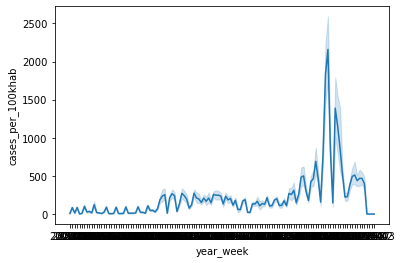

In [5]:
#Line Plot for EDA
ax=sns.lineplot(data=data, x="year_week", y="cases_per_100khab")
#plt.xticks([1,2,3],['2020','2021','2022'])

<AxesSubplot:xlabel='year_week', ylabel='first_dose_100k'>

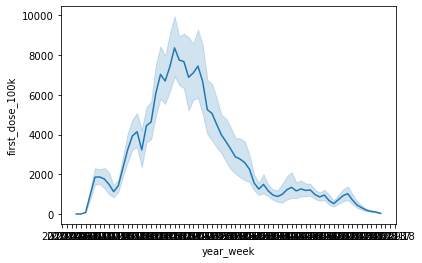

In [6]:
sns.lineplot(data=data, x="year_week", y="first_dose_100k")

In [7]:
data.fillna(value=0, axis=0, inplace=True)

<AxesSubplot:xlabel='year_week', ylabel='first_dose_100k'>

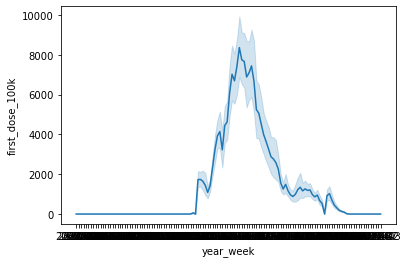

In [8]:
sns.lineplot(data=data, x="year_week", y="first_dose_100k")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoId               3667 non-null   object 
 1   year_week           3667 non-null   object 
 2   cases_per_100khab   3667 non-null   float64
 3   deaths_per_100khab  3667 non-null   float64
 4   cmltve_cases        3667 non-null   float64
 5   cmltve_deaths       3667 non-null   float64
 6   year_week_          3667 non-null   object 
 7   ReportingCountry    3667 non-null   object 
 8   first_dose_100k     3667 non-null   float64
 9   second_dose_100k    3667 non-null   float64
 10  cmltve_first_dose   3667 non-null   float64
 11  cmltve_second_dose  3667 non-null   float64
dtypes: float64(8), object(4)
memory usage: 372.4+ KB


In [10]:
data.dropna(axis=0,inplace=True)
data.drop(['year_week_','ReportingCountry'],axis=1,inplace=True)

In [11]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoId               3667 non-null   object 
 1   year_week           3667 non-null   object 
 2   cases_per_100khab   3667 non-null   float64
 3   deaths_per_100khab  3667 non-null   float64
 4   cmltve_cases        3667 non-null   float64
 5   cmltve_deaths       3667 non-null   float64
 6   first_dose_100k     3667 non-null   float64
 7   second_dose_100k    3667 non-null   float64
 8   cmltve_first_dose   3667 non-null   float64
 9   cmltve_second_dose  3667 non-null   float64
dtypes: float64(8), object(2)
memory usage: 315.1+ KB


(3667, 10)

I filled the NaN values with 0. Those values might be artifacts, yet we really didn't have vaccines before 2021, so we could consider those points as 0 anyway.

### Extract features from date

In [12]:
#data.info()
data['week']=data['year_week'].str.slice(start=-2)#.astype(int)
data['year']=data['year_week'].str.slice(stop=4)#.astype(int)

In [13]:
display(data.head())
data.info()

,geoId,year_week,cases_per_100khab,deaths_per_100khab,cmltve_cases,cmltve_deaths,first_dose_100k,second_dose_100k,cmltve_first_dose,cmltve_second_dose,week,year
0,AT,2020-00,6.628421,0.157285,12.886100,0.280865,0.0,0.0,0.0,0.0,00,2020
1,AT,2020-01,108.604994,1.808773,242.139591,3.505199,0.0,0.0,0.0,0.0,01,2020
2,AT,2020-05,11.976096,0.258396,847.932337,15.245368,0.0,0.0,0.0,0.0,05,2020
3,AT,2020-06,109.829566,1.797538,572.571998,9.010159,0.0,0.0,0.0,0.0,06,2020
4,AT,2020-08,0.089877,0.000000,948.369768,16.087964,0.0,0.0,0.0,0.0,08,2020


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 3666
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geoId               3667 non-null   object 
 1   year_week           3667 non-null   object 
 2   cases_per_100khab   3667 non-null   float64
 3   deaths_per_100khab  3667 non-null   float64
 4   cmltve_cases        3667 non-null   float64
 5   cmltve_deaths       3667 non-null   float64
 6   first_dose_100k     3667 non-null   float64
 7   second_dose_100k    3667 non-null   float64
 8   cmltve_first_dose   3667 non-null   float64
 9   cmltve_second_dose  3667 non-null   float64
 10  week                3667 non-null   object 
 11  year                3667 non-null   object 
dtypes: float64(8), object(4)
memory usage: 372.4+ KB


In [14]:
data.drop('year_week',axis=1,inplace=True)

In [19]:
new_columns=['year','week','geoId','cases_per_100khab','cmltve_cases','first_dose_100k','cmltve_first_dose','second_dose_100k','cmltve_second_dose','deaths_per_100khab','cmltve_deaths']
data=data[new_columns]

In [20]:
data.head()

,year,week,geoId,cases_per_100khab,cmltve_cases,first_dose_100k,cmltve_first_dose,second_dose_100k,cmltve_second_dose,deaths_per_100khab,cmltve_deaths
0,2020,00,AT,6.628421,12.886100,0.0,0.0,0.0,0.0,0.157285,0.280865
1,2020,01,AT,108.604994,242.139591,0.0,0.0,0.0,0.0,1.808773,3.505199
2,2020,05,AT,11.976096,847.932337,0.0,0.0,0.0,0.0,0.258396,15.245368
3,2020,06,AT,109.829566,572.571998,0.0,0.0,0.0,0.0,1.797538,9.010159
4,2020,08,AT,0.089877,948.369768,0.0,0.0,0.0,0.0,0.000000,16.087964


### Export data to csv

In [18]:
data.to_csv('../ML_models/data_for_ML.csv')